In [2]:
import os
import cv2
import numpy as np

# Set the main directory path
data_dir = r"C:\Users\Jathin S Lohi\Downloads\archive (2)"

# Define paths to Testing and Training folders
training_path = os.path.join(data_dir, 'Training')
testing_path = os.path.join(data_dir, 'Testing')

# Define categories based on the updated folder names
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists to store images and labels
def load_and_preprocess_images(folder_path):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(folder_path, category)
        
        # Check if the category folder exists
        if not os.path.exists(category_path):
            print(f"Category folder does not exist: {category_path}")
            continue
        
        label = categories.index(category)  # Assign a unique label for each category
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize to 128x128 pixels
                images.append(img)
                labels.append(label)
            else:
                print(f"Failed to load image: {img_path}")
    
    # Convert lists to numpy arrays and normalize
    images = np.array(images)
    labels = np.array(labels)
    images = images.astype('float32') / 255.0
    return images, labels

# Load and preprocess images from Training and Testing folders
train_images, train_labels = load_and_preprocess_images(training_path)
test_images, test_labels = load_and_preprocess_images(testing_path)

print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")


Training images shape: (5712, 128, 128, 3)
Testing images shape: (1311, 128, 128, 3)


In [4]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [5]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f"Training images shape: {X_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")


Training images shape: (4569, 128, 128, 3)
Validation images shape: (1143, 128, 128, 3)
Training labels shape: (4569,)
Validation labels shape: (1143,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


c:\Users\Jathin S Lohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 150ms/step - accuracy: 0.5658 - loss: 0.9855 - val_accuracy: 0.8241 - val_loss: 0.4313
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.8142 - loss: 0.4989 - val_accuracy: 0.8696 - val_loss: 0.3495
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 158ms/step - accuracy: 0.8659 - loss: 0.3684 - val_accuracy: 0.8880 - val_loss: 0.2918
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.8973 - loss: 0.2751 - val_accuracy: 0.9116 - val_loss: 0.2519
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.9224 - loss: 0.2122 - val_accuracy: 0.8941 - val_loss: 0.2331
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step - accuracy: 0.9350 - loss: 0.1818 - val_accuracy: 0.9265 - val_loss: 0.2081
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9560 - loss: 0.1298 - val_accuracy: 0.9274 - val_loss: 0.2211
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 158ms/step - accuracy: 0.9678 - loss: 0

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.5672 - loss: 1.0076 - val_accuracy: 0.8425 - val_loss: 0.4274
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.8040 - loss: 0.4863 - val_accuracy: 0.8854 - val_loss: 0.3297
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - accuracy: 0.8737 - loss: 0.3464 - val_accuracy: 0.8819 - val_loss: 0.2713
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.9198 - loss: 0.2458 - val_accuracy: 0.9186 - val_loss: 0.2033
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 158ms/step - accuracy: 0.9383 - loss: 0.1766 - val_accuracy: 0.9160 - val_loss: 0.2165
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.9472 - loss: 0.1468 - val_accuracy: 0.9265 - val_loss: 0.2026
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.9572 - loss: 0.1208 - val_accuracy: 0.9388 - val_loss: 0.1813
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - accuracy: 0.9701 - loss: 0

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9057 - loss: 0.3410
Test accuracy: 0.9374523162841797


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {labels[i]}, Pred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

# Display predictions
plot_predictions(test_images, test_labels, predictions)


NameError: name 'predictions' is not defined

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting model training...")

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

print("Model training complete.")


c:\Users\Jathin S Lohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting model training...
Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 24s 157ms/step - accuracy: 0.5802 - loss: 0.9793 - val_accuracy: 0.8495 - val_loss: 0.4348
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.8263 - loss: 0.4778 - val_accuracy: 0.8854 - val_loss: 0.3248
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 160ms/step - accuracy: 0.8531 - loss: 0.3872 - val_accuracy: 0.8906 - val_loss: 0.2992
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step - accuracy: 0.9061 - loss: 0.2585 - val_accuracy: 0.9099 - val_loss: 0.2466
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.9163 - loss: 0.2254 - val_accuracy: 0.9116 - val_loss: 0.2382
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - accuracy: 0.9380 - loss: 0.1630 - val_accuracy: 0.9335 - val_loss: 0.1888
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.9630 - loss: 0.1096 - val_accuracy: 0.9414 - val_loss: 0.1657
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step -

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting model training...")

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

print("Model training complete.")


Starting model training...
Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.5403 - loss: 1.0291 - val_accuracy: 0.8434 - val_loss: 0.4646
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.8135 - loss: 0.5066 - val_accuracy: 0.8766 - val_loss: 0.3307
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - accuracy: 0.8570 - loss: 0.3758 - val_accuracy: 0.8976 - val_loss: 0.2556
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.8984 - loss: 0.2812 - val_accuracy: 0.9020 - val_loss: 0.2347
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 160ms/step - accuracy: 0.9190 - loss: 0.2175 - val_accuracy: 0.9309 - val_loss: 0.1924
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.9487 - loss: 0.1484 - val_accuracy: 0.9300 - val_loss: 0.1792
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9582 - loss: 0.1255 - val_accuracy: 0.9396 - val_loss: 0.1677
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step -

In [12]:
from sklearn.model_selection import train_test_split

# Assuming train_images and train_labels are correctly loaded and defined
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print(f"Training images shape: {X_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training images shape: (4569, 128, 128, 3)
Validation images shape: (1143, 128, 128, 3)
Training labels shape: (4569,)
Validation labels shape: (1143,)


In [13]:
import os
import cv2
import numpy as np

# Define paths to your dataset
data_dir = r'C:\Users\Jathin S Lohi\Downloads\archive (2)'
training_path = os.path.join(data_dir, 'Training')
testing_path = os.path.join(data_dir, 'Testing')

# Define categories
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load training images
train_images = []
train_labels = []

for category in categories:
    folder_path = os.path.join(training_path, category)
    label = categories.index(category)  # Assign a label based on the category
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

print(f"Loaded {len(train_images)} training images.")


Loaded 5712 training images.


In [17]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths to your dataset
data_dir = r"C:\Users\Jathin S Lohi\Downloads\archive (2)"
training_path = os.path.join(data_dir, 'Training')
testing_path = os.path.join(data_dir, 'Testing')

# Define categories
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load training images
train_images = []
train_labels = []

for category in categories:
    folder_path = os.path.join(training_path, category)
    label = categories.index(category)  # Assign a label based on the category
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

print(f"Loaded {len(train_images)} training images.")

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print(f"Training images shape: {X_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")


Loaded 5712 training images.
Training images shape: (4569, 128, 128, 3)
Validation images shape: (1143, 128, 128, 3)
Training labels shape: (4569,)
Validation labels shape: (1143,)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting model training...")

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

print("Model training complete.")


Starting model training...
Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.5421 - loss: 20.8110 - val_accuracy: 0.8145 - val_loss: 0.4838
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.8003 - loss: 0.5519 - val_accuracy: 0.8766 - val_loss: 0.3541
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - accuracy: 0.8522 - loss: 0.3987 - val_accuracy: 0.8609 - val_loss: 0.3615
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.8741 - loss: 0.3234 - val_accuracy: 0.9020 - val_loss: 0.2700
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.8931 - loss: 0.2736 - val_accuracy: 0.8898 - val_loss: 0.2857
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.9106 - loss: 0.2204 - val_accuracy: 0.9274 - val_loss: 0.2192
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.9266 - loss: 0.1980 - val_accuracy: 0.8609 - val_loss: 0.3689
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step 

In [19]:
print("Evaluating model...")

# Assuming you have loaded test images and labels
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

print("Model evaluation complete.")


Evaluating model...
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.1605 - loss: 18.1075
Test accuracy: 0.30892449617385864
Model evaluation complete.


In [20]:
# Load testing images
test_images = []
test_labels = []

for category in categories:
    folder_path = os.path.join(testing_path, category)
    label = categories.index(category)  # Assign a label based on the category
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(f"Loaded {len(test_images)} test images.")


Loaded 1311 test images.


In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths to your dataset
data_dir = r"C:\Users\Jathin S Lohi\Downloads\archive (2)"
training_path = os.path.join(data_dir, 'Training')
testing_path = os.path.join(data_dir, 'Testing')

# Define categories
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load training images
train_images = []
train_labels = []

for category in categories:
    folder_path = os.path.join(training_path, category)
    label = categories.index(category)  # Assign a label based on the category
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

print(f"Loaded {len(train_images)} training images.")

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print(f"Training images shape: {X_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

# Load testing images
test_images = []
test_labels = []

for category in categories:
    folder_path = os.path.join(testing_path, category)
    label = categories.index(category)  # Assign a label based on the category
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(f"Loaded {len(test_images)} test images.")

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting model training...")

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

print("Model training complete.")

print("Evaluating model...")

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

print("Model evaluation complete.")


Loaded 5712 training images.
Training images shape: (4569, 128, 128, 3)
Validation images shape: (1143, 128, 128, 3)
Training labels shape: (4569,)
Validation labels shape: (1143,)
Loaded 1311 test images.
Starting model training...
Epoch 1/10


c:\Users\Jathin S Lohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.5398 - loss: 20.4014 - val_accuracy: 0.8154 - val_loss: 0.4943
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.7920 - loss: 0.5245 - val_accuracy: 0.8688 - val_loss: 0.3681
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.8754 - loss: 0.3629 - val_accuracy: 0.8801 - val_loss: 0.3345
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.8818 - loss: 0.3308 - val_accuracy: 0.9081 - val_loss: 0.2540
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.9213 - loss: 0.2279 - val_accuracy: 0.9064 - val_loss: 0.2695
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - accuracy: 0.9283 - loss: 0.2174 - val_accuracy: 0.9151 - val_loss: 0.2543
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.9418 - loss: 0.1595 - val_accuracy: 0.9344 - val_loss: 0.2261
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 0.9507 - loss: 0.1340 - va

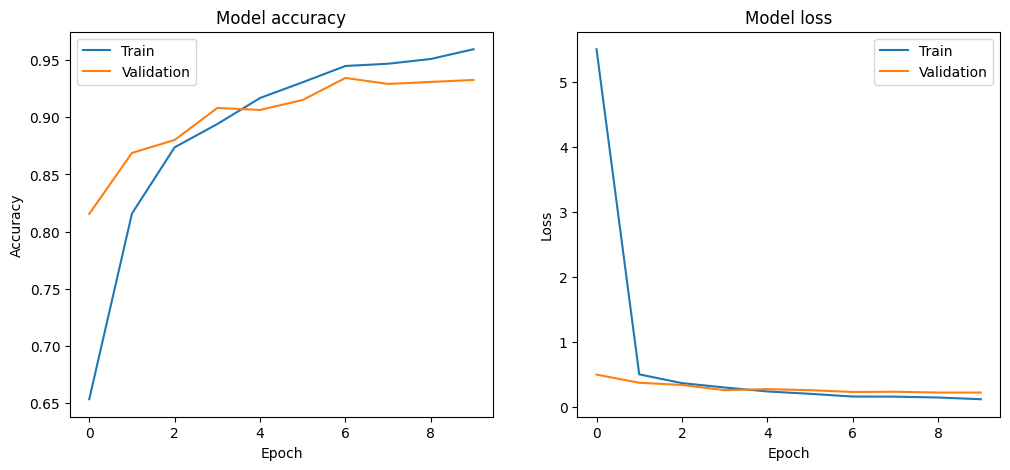

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


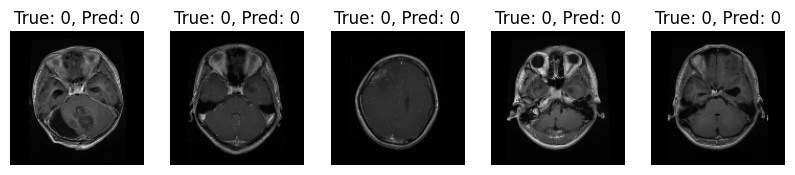

In [24]:
predictions = model.predict(test_images)

# Visualize some predictions
def plot_predictions(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {labels[i]}, Pred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

plot_predictions(test_images, test_labels, predictions)


In [25]:
model.save('brain_tumor_model.h5')
print("Model saved as 'brain_tumor_model.h5'.")


Model saved as 'brain_tumor_model.h5'.


In [27]:
from tensorflow.keras.models import load_model

model = load_model('brain_tumor_model.h5')
print("Model loaded from 'brain_tumor_model.keras'.")


Model loaded from 'brain_tumor_model.keras'.


In [28]:
model.save('brain_tumor_model.keras')
print("Model saved as 'brain_tumor_model.keras'.")


Model saved as 'brain_tumor_model.keras'.


In [29]:
from tensorflow.keras.models import load_model

model = load_model('brain_tumor_model.keras')
print("Model loaded from 'brain_tumor_model.keras'.")


Model loaded from 'brain_tumor_model.keras'.


c:\Users\Jathin S Lohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [30]:
from tensorflow.keras.optimizers import Adam

# Load model architecture and weights
model = load_model('brain_tumor_model.keras')

# Rebuild optimizer and compile model
model.compile(optimizer=Adam(),  # or any other optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [31]:
from tensorflow.keras.optimizers import Adam

# Load model architecture and weights
model = load_model('brain_tumor_model.keras')

# Rebuild optimizer and compile model
model.compile(optimizer=Adam(),  # or any other optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load model architecture and weights
model = load_model('brain_tumor_model.keras')

# Rebuild optimizer and compile model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print("Model summary:")
model.summary()

# Check optimizer state
print("Optimizer used:", model.optimizer)

# Optionally, test with a small batch of test images
predictions = model.predict(test_images[:5])
print("Sample predictions:", predictions)


Model summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Optimizer used: <keras.src.optimizers.adam.Adam object at 0x000002AA8F6B4530>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Sample predictions: [[9.9928600e-01 6.5845770e-06 6.4159435e-04 6.5824774e-05]
 [9.9999952e-01 1.0871384e-08 7.0418643e-08 3.1111205e-07]
 [1.0000000e+00 3.9609924e-09 7.0641393e-10 2.7239788e-09]
 [6.5853083e-01 2.9410443e-01 6.9438123e-05 4.7295261e-02]
 [1.0000000e+00 1.7953662e-15 6.2384273e-12 2.1749142e-11]]
